# 

# Common Tweet Emojis

<div class="alert alert-success"> 
In order to assess how many emojis we want to gather data for, we need to run an analysis of the most used ones. (Indeed, asking a few thousands users to describe an emoji like 🥍 might be less useful than😄) 
</div>

In [91]:
from collections import Counter
import emoji
import seaborn as sns
import pandas as pd
import resource
from tqdm import tqdm
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
sns.set()

In [21]:
def limit_memory(maxsize): 
    """ Prevent computer from crashing"""
    soft, hard = resource.getrlimit(resource.RLIMIT_AS) 
    resource.setrlimit(resource.RLIMIT_AS, (maxsize, maxsize)) 
#limit_memory(10000)

In [13]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

extract_emojis("😚;👻💆🏿🚯🇸🇷")

In [36]:
tweet_path = "../data/raw/tweets/example-tweets.txt"
tweet_df = pd.read_csv(tweet_path,sep="\t",header=None,parse_dates=True)

In [36]:
tweet_df.columns = ['lang','id','date','user','text']
tweet_df = tweet_df[tweet_df['lang'] == 'en']
#tweet_df.info(memory_usage='deep')

In [100]:
def update_emoji_count(dic,text):
    for char in text:
        if char in emoji.UNICODE_EMOJI:
            dic[char] = dic.get(char,0) + 1

emojis_count = {}
for text in tqdm(tweet_df['text']):
    update_emoji_count(emojis_count,text)

em_df = pd.Series(emojis_count).sort_values(ascending=False)

In [116]:
# TODO: correct for missing emojis
absent_emojis = set(emoji.UNICODE_EMOJI) - set(emojis_count.keys())
print(f"Grasped {len(emojis_count) / len(emoji.UNICODE_EMOJI)* 100:.2f}% of the total emojis")
print("Missing emojis")
for em in absent_emojis:
    print(em,end="")

Grasped 8.94% of the total emojis
Missing emojis
🧏🙇🏿‍♂️🧙🏻🐄🇯🇴🇨🇲👣🏻👨🏻‍⚕🍖🙎🏼✊🏼👩🏼‍🤝‍👨🏿✍🏻🤶🧚🏿‍♂️🥖🇧🇹🙇🏾🍙🖖🏻👩🏼‍🚀👱🏽‍♂🤦🏼‍♀️🙎🏾‍♂️🔮🤦🏻‍♂🧑🏼‍🤝‍🧑🏼🤬🏌️‍♂️💇🏼‍♀👨‍🎤👨🏼‍🏫💬🐞🦹🏿🦸🏼‍♂👩🏾‍🔬🐁🧃👸🏼🧙🏽‍♀👷💁🏻🙌🏼🇮🇴🇺🇿🛴🔼🧜🏾‍♀🧍🏿‍♀👩🏽‍🦰💇‍♂🧏🏻💂🏾‍♂️🇯🇪🥁🇲🇼♈🍊🧗🏾‍♀👩🏼‍✈️🧍🏼‍♂🐖👳🏽🚊🙋🏿🇳🇪🦖👉🏿1⃣🏏🧚🏼‍♂🧖🏽‍♀🇵🇬🕑🙅🏾‍♀🚉⛓🛥👩🏾‍⚖️🦻🏿💶🚴‍♂️🇹🇿👴♣️👈🏾🇪🇭👩🏻‍🌾💂🏿‍♀🕴🏻🇸🇩🐓🌃🤾🏻‍♀️⛺🕎🕵🏾👩🏽‍⚖🤷🏾‍♀🇲🇾‼️👈🏼👱🏻‍♂️🧜‍♀🙆🏼‍♀🤸🏾‍♀🤙🏼🚴🏼‍♂💃🏻👈🏽🙎🏻♍👷‍♀👱‍♂️👳‍♀️🖕🏿🍵🧗🏾‍♂️🏑🧥🧏‍♂️🦳👩‍🚀🟡🙇🏼🤩🤸🏼‍♂️🍥💁🏿‍♀️👋🏿👩🏼‍🔧🙍🏽‍♂️🥻👩🏼🇩🇰🧘‍♂🇨🇨💆🏽‍♂️🧎🏽‍♂️⏱🧚🏻‍♂️💂🏻‍♂🇦🇪👇🏼🙍🏼‍♂️🏌🏽‍♂️👩‍👧‍👧🙋🏼‍♂️💻👨🏽‍🎓🦸🏻‍♂◻️🤹🏽‍♀️🕵🏿‍♂🧝‍♀🤲🏼🗃️🏵🥏☝🏿👷‍♂🧖🚣⏯🥙👩‍⚕️🧝🇸🇷👩‍👩‍👦👩🏽‍🦲📴⚖🤸🏻‍♀️👩‍💼🦸🏿‍♀️🇧🇼🧏‍♀💇🏽‍♀🇮🇸🔟💂🏿‍♂️🤾🏾🕗🕳⛸️👩‍❤‍👨🏊🏼‍♂🧎🏾‍♀️🦴🚣🏽‍♂️💁🏽‍♀️🧕🏽👼🏼👨🏻‍🏫🕓🏗👩🏽‍⚕🕴🏼👳🏻‍♂️🎍🙍‍♀🦹‍♂🇵🇼📝🏚️🏊🏽🙎🏽👱🏿‍♀👩🏽‍🤝‍👨🏾▶️🧝🏽⛹🏼‍♂️🙋🏻‍♂️👩🏼‍🎤🎞🧝🏽‍♀🧘🏽‍♀💪🏽🈷️🏃🏾‍♀️👩🏿‍💼🧖‍♀️🧙🏽🤷🏽🧝🏼‍♀️🧙‍♀⛹🏿‍♂️👨🏾‍🏫🇹🇦🧏🏾‍♂🧚🏾‍♀👱🏻‍♀️🇱🇮🏌🏿‍♂👨🏾‍🌾🏄‍♂🎿👩🏼‍🤝‍👨🏾🧱👨🏿‍🍳🙅🏻🧙‍♀️👨🏼‍✈️👦🏻🤷🏿🧞‍♀🇧🇷🛠️📗💆🏿🧘🏻🧝🏿👍🏼👩🏻‍🚒💂🏽‍♀️🇩🇴📒🗳🧴🛌🏿🇨🇿🤚🏾🩹🇽👨‍👩‍👦🤛🏽📧🌩️💆🏼🚩👔◻🍅💽🧇🛋🤟🏽🧚‍♂️🧖🏿‍♂️🎟️💝🌤👨🏼‍💼⏭🇮🇳🐐🙆🏾‍♀🧎‍♂🥟🕵🏾‍♂👒🙍🏾🟥🗒🧍‍♀️🖨🧏🏻‍♂️🇲🇳🧙🏼®️🥪🎇🗳️🇦🇹🏄🏼👱‍♀️🧚🏾💼🦶🏻🧂🍤🈺🚵🏾‍♂️🤳🏻🗓👩🏿‍⚕🧟‍♀️🏊🏻‍♀️👨🏻📙👋🏾🙆🏼‍♂☮️🏴‍☠️👳🏼🚕🚣🏼‍♀🙋🏾‍♀👱🏼🙋🏼‍♂⚫♨️🏌‍♀️🏋️‍♀️◽🤷🏻‍♀️🦹🏼🇬🇸👷🏼‍♀🥴🇸🇻✋🏾🚣🏾‍♀🩳🚣‍♂️👵🏼🖥🤦🏾‍♀🥳🔯🍢🏋🏼‍♂️⛹‍♂️🤽🏼‍♂🧎🏿‍♂🧜🏿‍♀️🕴🏿👷🏽‍♀️🇸🇲👩‍🦲

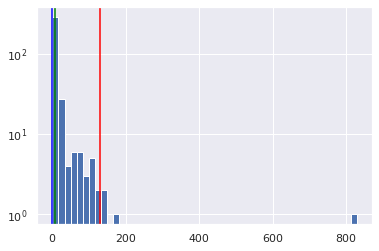

In [130]:
fig, ax = plt.subplots(1)
em_df.hist(ax = ax,bins=50)
ax.set_yscale('log')
q25,q75,q99 = em_df.quantile(0.25),em_df.quantile(0.75),em_df.quantile(0.99)
ax.axvline(q25,color='blue',label = 'q25')
ax.axvline(q75,color='green',label = 'q75')
ax.axvline(q99,color='red',label = 'q99')

<AxesSubplot:>

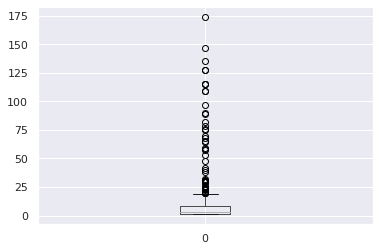

In [111]:
em_df[1:].to_frame().boxplot()